# **비접촉 Radar 데이터를 활용한 심박수 및 호흡수 예측**

## **1. 프로젝트 목표**
**비접촉 레이더 데이터를 활용, 접촉데이터(ECG)와 비교학습(training)하여, 레이더 데이터만 가지고 심박수, 호흡수를 예측하는 프로젝트입니다.** 


- HR(심박, Heart Rate) 및 BR(호흡,Breathing Rate) 예측 모델링
- 주어진 Radar 데이터에서 정확한 HR과 BR을 예측하기 위한 개인별, FFT크기별 데이터 분석 (DA)
- 데이터를 활용한 ML/DL 모델 파이프라인 구축 프로젝트

- 최종 목표 : **데이터 셋을 활용하여 가장 정확도가 높은 BPM을 선택하는 모델 만들기**

## **2. 신호시스템 이론 학습**

### **(1) 신호와 시스템 개요**
- 신호는 물리량의 변화 형태를 담은 일련의 정보의 집합이다.
- 시스템은 일련의 신호를 받아들여 어떤 작용을 거쳐 다른 일련의 신호를 만들어내는 실체로서 신호의 변환, 가공, 추출, 전송 등의 일들을 수행한다.
- 신호 처리는 원하는 결과를 얻을 수 있도록 시스템을 이용하여 신호에 대해 교환, 변환, 가공, 전송, 저장 등의 조작을 수행하는 작업으로 해석, 합성, 변환, 필터링 네 개의 범주로 나눌 수 있다.
- 신호와 시스템의 수학적 모형은 변수가 시간인 시간 영역 표현과 변수가 주파수인 주파수 영역 표현으로 나눌 수 있다.
- 정현파는 신호와 시스템에서 가장 기본이 되는 신호로, 사인 또는 코사인 함수로 나타내며, 진폭, 위상, 주파수의 세 가지 요소에 의해 완전하게 정의된다.
- x(t) = A cos(ωt+Φ)
- 여기서 A는 진폭, Φ는 위상, ω를 각주파수라고 한다.
- 주기는 정현파가 같은 파형을 반복하는 시간 간격이고, 주파수는 정현파가 1초에 같은 파형을 반복하는 횟수로서 서로 역수 관계이다.
- 블록선도는 각 시스템 구성 요소를 블록으로 나타내고 신호의 흐름에 따라 블록 간의 연결 관계를 그려놓은 그림이다.

### **(2) 연속 시간 푸리에 급수**
- 일반적으로 신호는 시간의 경과에 따라 관측하고 다루기 때문에 시간의 함수로 표현하는 것이 자연스럽고 익숙하지만, 신호의 특성을 완전히 파악하기에는 한계가 있다. 따라서 새로운 관점에서 신호를 바라볼 필요가 있는데, 주파수가 바로 그것이다. 신호에 포함된 주파수 성분들을 구분하여 나타낸 것이 스펙트럼인데, 사람의 지문과 마찬가지로 신호마다 제각기 다른 고유의 스펙트럼을 갖는다. 그러므로 스펙트럼은 신호를 구분하고 특성을 규명하는데 매우 효과적인 수단으로 활용된다.

- 주파수와 연관시켜 신호를 나타내고 다루려면 우선 시간 함수로 표현된 신호를 주파수에 대한 표현으로 바꿔야 하는데, 이를 푸리에 급수/변환으로 해결할 수 있다. 푸리에 급수는 신호를 주파수에 대해 일대일 대응 관계를 가지는 정현파들로 분해하여 나타냄으로써, 신호를 주파수에 연관시켜 파악하고 다룰 수 있게 해주는 수학적 기법이다.

- 변환은 단지 신호의 표현을 바꾸는 작업으로서 신호 자체는 달라지지 않는다. 

- 신호는 x(t) = ΣcΦ(t)와 같이 기저 신호들의 선형 결합으로 나타낼 수 있고, 변환은 결국 계수 c를 구하는 문제가 된다.

- 정현파를 주파수의 함수로 취급하여 주파수축 상에서 정현파의 진폭과 위상을 나타낸 것이 스펙트럼이다. 스펙트럼의 표현은 삼각함수 정현파나 복소 정현파를 사용할 수 있다.

- 푸리에 급수는 주기 신호를 기본파와 고조파들의 합으로 나타낸 것으로, 기본파는 주기 신호와 같은 주기를 갖는 정현파이며, 고조파는 기본파의 주파수의 정수배 주파수를 갖는 정현파이다.

- 푸리에 급수 표현의 기저 신호인 (복소)정현파는 직교성을 만족하며, 푸리에 계수는 정현파의 직교성을 이용해 구할 수 있다.


### **(3) 연속 시간 푸리에 변환**
- 앞서 푸리에 급수에 의한 주기 신호의 취급을 통해 신호와 시스템을 주파수 영역에서 표현하고 분석하는 것이 매우 유용하고 효과적임을 보았다. 그러나 주기 신호는 세상에 존재하는 신호의 극히 일부분에 지나지 않는다. 그러므로 **비주기 신호에 대해서도 주파수 영역으로 변환할 수 있는 도구가 필요**하다.

- 이 때 가능하다면 논리적 일관성을 위해 이 도구가 푸리에 급수와 동일한 이론적 배경을 가지는 것이 바람직하다. 이런 관점에서 비주기 신호를 주기가 무한대인 주기 신호로 간주해 푸리에 급수를 확장하여, 비주기 신호를 연속적인 주파수를 갖는 무수히 많은 정현파 성분의 합으로 표현하는 것이 바로 **푸리에 변환**이다.

### **(4) 이산푸리에변환(DFT)과 고속푸리에변환(FFT)**
- 푸리에 해석 기법은 주파수 관점으로 신호와 시스템을 취급하는 유용한 수단이지만 실제 문제에 적용하려면 어려움이 따른다. 이러한 어려움은 컴퓨터를 이용하면 해소될 수 있으나, 컴퓨터로 푸리에 해석을 수행하기 위해서는 신호와 스펙트럼이 모두 디지털 처리에 적합한 이산 데이터여야 한다.

- 이를 위해 신호는 샘플링을 이용함으로써, 스펙트럼은 이산 주기 신호의 스펙트럼이 이산 주기 함수임을 이용함으로써, 컴퓨터를 이용한 신호 및 시스템의 해석에 적합한 푸리에 변환을 고안한 것이 바로 **이산 푸리에 변환(DFT)**이다.

- DFT의 계산량을 획기적으로 줄여 적은 계산량으로 효율적으로 DFT를 계산할 수 있도록 제안된 것이 **고속 푸리에 변환(FFT)**이다. 푸리에 해석 기법을 실제 문제에 적용할 때는 대부분 FFT를 활용한다. 주파수 영역 기법을 이용한 신호와 시스템이 실용화 될 수 있었던 배경에는 FFT가 자리잡고 있다.

- FFT는 새로운 형태의 변환이 아니라, DFT를 효과적으로 계산하기 위한 알고리즘이다. 기본 원리는 주어진 이산 신호를 여러 개의 길이가 짧은 신호로 분할하여 분할된 신호들의 DFT를 구한 후, 그 결과들을 적절하게 결합하여 주어진 신호의 DFT를 수행하는 것이다.

### **(5) 기타**
- IQ 신호는 자연과학과 공학의 많은 분야에 사용되며, 특히 디지털 통신 분야에서는 필수적이다. 복소수 체계를 기반으로 하기에 complex signal(복소 신호)라고도 불리며 I와 Q 2개로 이루어져 있다. '특정 시간에서의 값을 하나의 복소수로 표현할 수 있는 2차원 신호' 라고 수학적으로 정의되며, 복소수는 실수부와 복소부 2개로 나누어지며 이 때 각각을 in-phase와 quadrature phase라고 부르며 이 단어 앞글자를 따서 I, Q라 한다.
- CW 방식은 정현파 신호를 송신하여 되돌아오는 주파수가 다르게 수신되어 나타나는 주파수 차이를 이용하여 속도를 알 수 있는 방식이며, 주로 모션감지, 속도측정 분야에서 사용되는 방식이다. FMCW 레이더는 FM 변조된 송신파를 수신받아 발생하는 주파수를 이용하여 거리 특성을 알 수 있는 방식으로, 속도, 거리측정이 가능하며, 안테나를 두 개 이상 사용할 경우 위치를 파악할 수 있는 방식이다.

## **3. 데이터 분석**

### **(1) 데이터 살펴보기**
회귀 문제에서는 타겟의 분포를 주의깊게 살펴보아야 한다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [165]:
# 데이터 불러오기
# 파일이름 : 날짜+사람+거리+자세
data_sit = pd.read_csv('/content/drive/MyDrive/1.codestates/FinalProject/output/log_20200909110309_chc_0.5_sit_none.csv')
data_lie = pd.read_csv('/content/drive/MyDrive/1.codestates/FinalProject/output/log_20201111155643_ksj_0.5_lie_none.csv')
data_sleep = pd.read_csv('/content/drive/MyDrive/1.codestates/FinalProject/output/log_20210811104835_les_1.0_sleep.csv')
data_lie_10 = pd.read_csv('/content/drive/MyDrive/1.codestates/FinalProject/output/log_20210818153244_kdu_1.0_lie_none.csv')
data_lie_AC = pd.read_csv('/content/drive/MyDrive/1.codestates/FinalProject/output/log_20210824141813_kdu_1.0_lie_acryl.csv')
data_lie_OP = pd.read_csv('/content/drive/MyDrive/1.codestates/FinalProject/output/log_20210824141815_kdu_1.0_lie_opaque.csv')

In [5]:
print(data_sit.shape)
print(data_sleep.shape)
print(data_lie.shape)
print(data_lie_10.shape)

(24000, 16)
(37200, 16)
(13200, 16)
(43200, 16)


In [6]:
data_sit[1001:1100].head()

,Unnamed: 0,ecg,bpm,bin-2,bin-1,bin0,bin1,bin2,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
1001,1001,87.613105,87.800953,59.765625,85.546875,59.765625,87.890625,59.765625,59.765625,60.351562,91.406250,89.0625,58.59375,67.96875,2.59,2.387349
1002,1002,87.613105,87.808569,59.765625,85.546875,59.765625,87.890625,59.765625,59.765625,60.937500,91.406250,89.0625,58.59375,67.96875,0.75,2.387349
1003,1003,87.613105,87.816185,59.765625,85.546875,59.765625,87.890625,59.765625,59.765625,61.523438,91.406250,89.0625,58.59375,67.96875,0.84,2.387349
1004,1004,87.613105,87.823801,59.765625,85.546875,59.765625,87.890625,59.765625,59.765625,62.695312,90.820312,89.0625,58.59375,67.96875,0.91,2.387349
1005,1005,87.640449,87.831417,59.765625,85.546875,59.765625,87.890625,59.765625,59.765625,63.281250,90.234375,89.0625,58.59375,77.34375,0.96,2.387349


In [7]:
data_sleep[1001:1100].head()

,Unnamed: 0,ecg,bpm,bin-2,bin-1,bin0,bin1,bin2,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
1001,1001,81.051345,61.132812,87.890625,60.9375,105.46875,67.96875,97.265625,105.46875,55.078125,105.46875,105.46875,62.695312,108.984375,0.5275,0.250103
1002,1002,79.913070,61.175272,87.890625,60.9375,105.46875,67.96875,97.265625,105.46875,55.078125,105.46875,105.46875,85.546875,108.984375,0.8500,0.250103
1003,1003,79.913070,61.217731,99.609375,60.9375,105.46875,67.96875,97.265625,105.46875,55.078125,105.46875,105.46875,108.984375,108.984375,0.8500,0.250103
1004,1004,79.913070,61.260190,111.328125,60.9375,105.46875,67.96875,97.265625,105.46875,55.078125,105.46875,105.46875,108.984375,108.984375,0.8500,0.250103
1005,1005,79.913070,61.302649,111.328125,60.9375,105.46875,67.96875,97.265625,105.46875,84.960938,105.46875,105.46875,108.984375,108.984375,0.8500,0.250103


- ECG : electrocardiogram 심전도 (접촉 데이터)
- BPM : 분당 심장 박동수
- FFT : Fast Fourier Transform (512fft = 512 frame window의 FFT로 BPM)
- bin_var : 큰 움직임(3.6cm)의 정도
- motion_energy : 작은 움직임(레이더 신호의 흔들림 크기)의 정도

### **(2) 타겟 데이터 분포 확인**

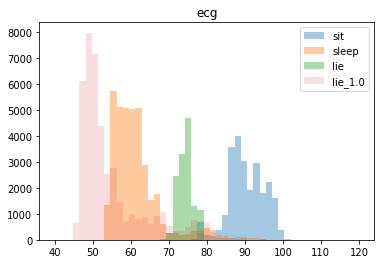

In [8]:
# 타겟값 분포 확인
bins = np.linspace(40, 120, 50)

plt.title('ecg')
plt.hist(data_sit['ecg'], bins, alpha = 0.4, label = 'sit')
plt.hist(data_sleep['ecg'], bins, alpha = 0.4, label = 'sleep')
plt.hist(data_lie['ecg'], bins, alpha = 0.4, label = 'lie')
plt.hist(data_lie_10['ecg'], bins, alpha = 0.15, label = 'lie_1.0')
plt.legend(loc='upper right')

plt.show()

- sit 데이터가 가장 정규분포에 가깝다. -> 예측 성능이 뛰어날 가능성이 높다

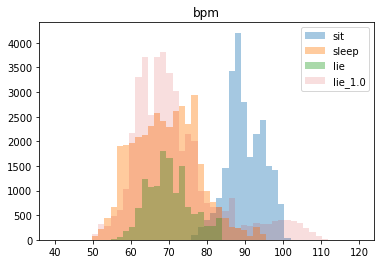

In [9]:
bins = np.linspace(40, 120, 50)

plt.title('bpm')
plt.hist(data_sit['bpm'], bins, alpha = 0.4, label = 'sit')
plt.hist(data_sleep['bpm'], bins, alpha = 0.4, label = 'sleep')
plt.hist(data_lie['bpm'], bins, alpha = 0.4, label = 'lie')
plt.hist(data_lie_10['bpm'], bins, alpha = 0.15, label = 'lie_1.0')
plt.legend(loc='upper right')

plt.show()

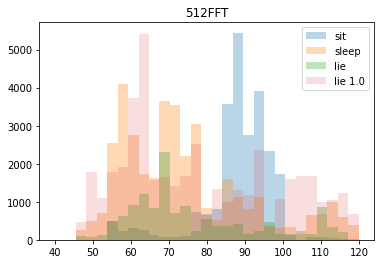

In [10]:
# 512FFT 분포 확인
bins = np.linspace(40, 120, 30)

plt.title('512FFT')
plt.hist(data_sit['512fft'], bins, alpha = 0.3, label = 'sit')
plt.hist(data_sleep['512fft'], bins, alpha = 0.3, label = 'sleep')
plt.hist(data_lie['512fft'], bins, alpha = 0.3, label = 'lie')
plt.hist(data_lie_10['512fft'], bins, alpha = 0.15, label = 'lie 1.0')
plt.legend(loc='upper right')

plt.show()

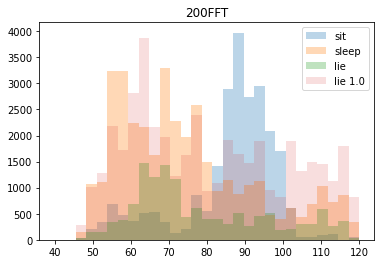

In [12]:
# 200FFT 분포 확인
bins = np.linspace(40, 120, 30)

plt.title('200FFT')
plt.hist(data_sit['200fft'], bins, alpha = 0.3, label = 'sit')
plt.hist(data_sleep['200fft'], bins, alpha = 0.3, label = 'sleep')
plt.hist(data_lie['200fft'], bins, alpha = 0.3, label = 'lie')
plt.hist(data_lie_10['200fft'], bins, alpha = 0.15, label = 'lie 1.0')
plt.legend(loc='upper right')

plt.show()

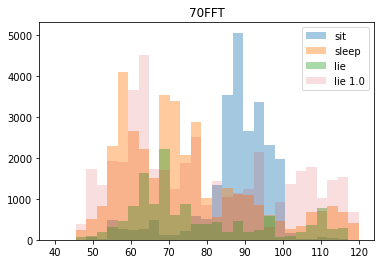

In [13]:
# 70FFT 분포 확인
bins = np.linspace(40, 120, 30)

plt.title('70FFT')
plt.hist(data_sit['70fft'], bins, alpha = 0.4, label = 'sit')
plt.hist(data_sleep['70fft'], bins, alpha = 0.4, label = 'sleep')
plt.hist(data_lie['70fft'], bins, alpha = 0.4, label = 'lie')
plt.hist(data_lie_10['70fft'], bins, alpha = 0.15, label = 'lie 1.0')
plt.legend(loc='upper right')

plt.show()

### **(3) FFT 데이터 분포 비교**

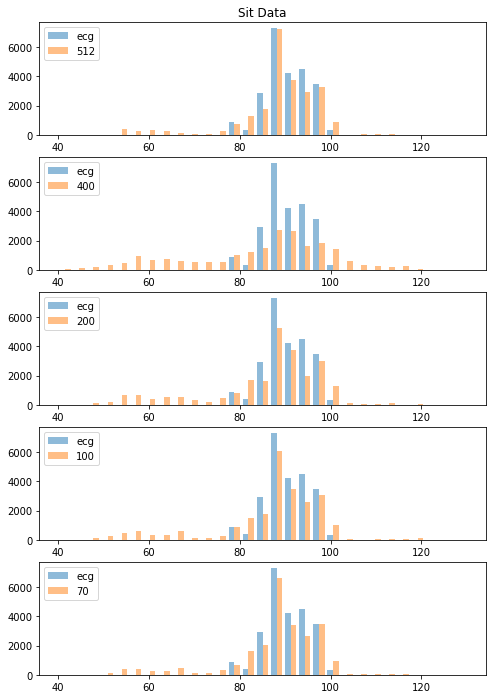

In [14]:
bins = np.linspace(40, 130, 30)
plt.figure(figsize=(8,12))

plt.subplot(511)
plt.title('Sit Data')
plt.hist([data_sit['ecg'],data_sit['512fft']], bins, alpha = 0.5, label = ['ecg', '512'])
plt.legend(loc='upper left')

plt.subplot(512)
plt.hist([data_sit['ecg'],data_sit['400fft']], bins, alpha = 0.5, label = ['ecg', '400'])
plt.legend(loc='upper left')

plt.subplot(513)
plt.hist([data_sit['ecg'],data_sit['200fft']], bins, alpha = 0.5, label = ['ecg', '200'])
plt.legend(loc='upper left')

plt.subplot(514)
plt.hist([data_sit['ecg'],data_sit['100fft']], bins, alpha = 0.5, label = ['ecg', '100'])
plt.legend(loc='upper left')

plt.subplot(515)
plt.hist([data_sit['ecg'],data_sit['70fft']], bins, alpha = 0.5, label = ['ecg', '70'])
plt.legend(loc='upper left')

plt.show()

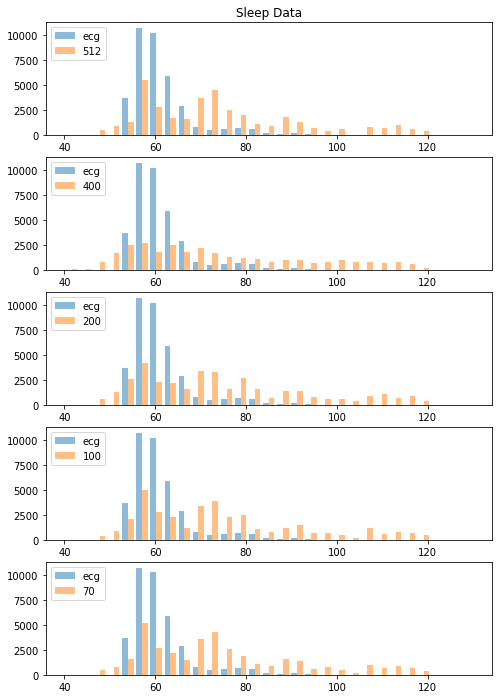

In [15]:
bins = np.linspace(40, 130, 30)
plt.figure(figsize=(8,12))

plt.subplot(511)
plt.title('Sleep Data')
plt.hist([data_sleep['ecg'],data_sleep['512fft']], bins, alpha = 0.5, label = ['ecg', '512'])
plt.legend(loc='upper left')

plt.subplot(512)
plt.hist([data_sleep['ecg'],data_sleep['400fft']], bins, alpha = 0.5, label = ['ecg', '400'])
plt.legend(loc='upper left')

plt.subplot(513)
plt.hist([data_sleep['ecg'],data_sleep['200fft']], bins, alpha = 0.5, label = ['ecg', '200'])
plt.legend(loc='upper left')

plt.subplot(514)
plt.hist([data_sleep['ecg'],data_sleep['100fft']], bins, alpha = 0.5, label = ['ecg', '100'])
plt.legend(loc='upper left')

plt.subplot(515)
plt.hist([data_sleep['ecg'],data_sleep['70fft']], bins, alpha = 0.5, label = ['ecg', '70'])
plt.legend(loc='upper left')

plt.show()

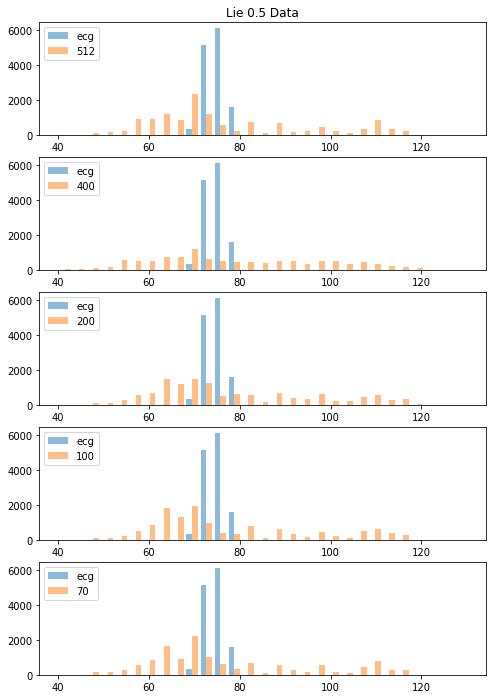

In [16]:
bins = np.linspace(40, 130, 30)
plt.figure(figsize=(8,12))

plt.subplot(511)
plt.title('Lie 0.5 Data')
plt.hist([data_lie['ecg'],data_lie['512fft']], bins, alpha = 0.5, label = ['ecg', '512'])
plt.legend(loc='upper left')

plt.subplot(512)
plt.hist([data_lie['ecg'],data_lie['400fft']], bins, alpha = 0.5, label = ['ecg', '400'])
plt.legend(loc='upper left')

plt.subplot(513)
plt.hist([data_lie['ecg'],data_lie['200fft']], bins, alpha = 0.5, label = ['ecg', '200'])
plt.legend(loc='upper left')

plt.subplot(514)
plt.hist([data_lie['ecg'],data_lie['100fft']], bins, alpha = 0.5, label = ['ecg', '100'])
plt.legend(loc='upper left')

plt.subplot(515)
plt.hist([data_lie['ecg'],data_lie['70fft']], bins, alpha = 0.5, label = ['ecg', '70'])
plt.legend(loc='upper left')

plt.show()

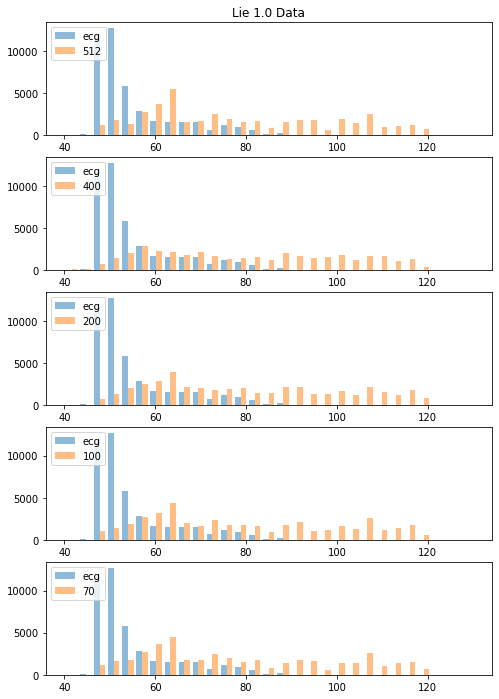

In [17]:
bins = np.linspace(40, 130, 30)
plt.figure(figsize=(8,12))

plt.subplot(511)
plt.title('Lie 1.0 Data')
plt.hist([data_lie_10['ecg'],data_lie_10['512fft']], bins, alpha = 0.5, label = ['ecg', '512'])
plt.legend(loc='upper left')

plt.subplot(512)
plt.hist([data_lie_10['ecg'],data_lie_10['400fft']], bins, alpha = 0.5, label = ['ecg', '400'])
plt.legend(loc='upper left')

plt.subplot(513)
plt.hist([data_lie_10['ecg'],data_lie_10['200fft']], bins, alpha = 0.5, label = ['ecg', '200'])
plt.legend(loc='upper left')

plt.subplot(514)
plt.hist([data_lie_10['ecg'],data_lie_10['100fft']], bins, alpha = 0.5, label = ['ecg', '100'])
plt.legend(loc='upper left')

plt.subplot(515)
plt.hist([data_lie_10['ecg'],data_lie_10['70fft']], bins, alpha = 0.5, label = ['ecg', '70'])
plt.legend(loc='upper left')

plt.show()

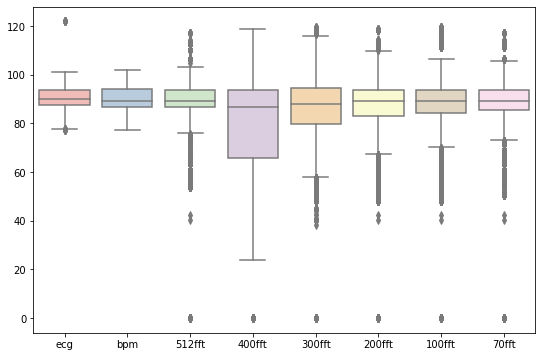

In [18]:
data_sit_plot = data_sit.loc[:, ['ecg', 'bpm', '512fft', '400fft', '300fft', '200fft', '100fft', '70fft']]

plt.figure(figsize=(9,6))
sns.boxplot(data=data_sit_plot, palette='Pastel1')

plt.show()

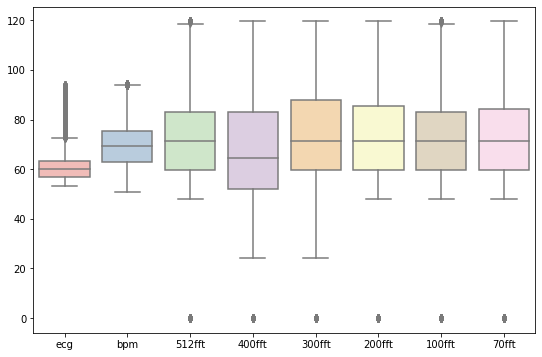

In [19]:
data_sleep_plot = data_sleep.loc[:, ['ecg', 'bpm', '512fft', '400fft', '300fft', '200fft', '100fft', '70fft']]

plt.figure(figsize=(9,6))
sns.boxplot(data=data_sleep_plot, palette='Pastel1')

plt.show()

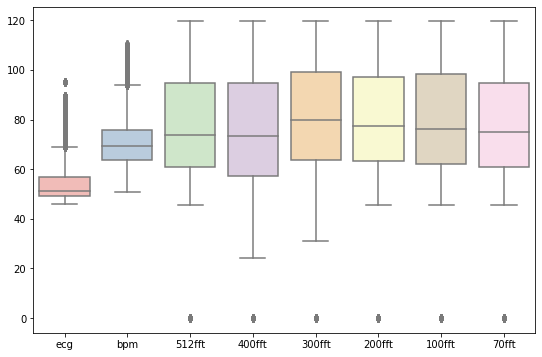

In [20]:
data_lie_plot = data_lie_10.loc[:, ['ecg', 'bpm', '512fft', '400fft', '300fft', '200fft', '100fft', '70fft']]

plt.figure(figsize=(9,6))
sns.boxplot(data=data_lie_plot, palette='Pastel1')

plt.show()

- Boxplot : 위에서부터 최대값, 3사분위수, 중앙값, 1사분위수, 최소값을 의미. 특이점은 점으로 표시.

### **(4) 상관관계 분석**

In [21]:
data_sit_corr = data_sit.loc[:, ['ecg', 'bpm', '512fft', '400fft', '300fft', '200fft', '100fft', '70fft']]
data_sleep_corr = data_sleep.loc[:, ['ecg', 'bpm', '512fft', '400fft', '300fft', '200fft', '100fft', '70fft']]

In [22]:
sit_cor = data_sit_corr.corr()
sleep_cor = data_sleep_corr.corr()
sit_cor

,ecg,bpm,512fft,400fft,300fft,200fft,100fft,70fft
ecg,1.000000,0.844092,0.384999,0.046043,0.156338,0.229983,0.294353,0.355088
bpm,0.844092,1.000000,0.543525,0.092161,0.208695,0.320577,0.395330,0.501176
512fft,0.384999,0.543525,1.000000,0.141598,0.289852,0.444118,0.504785,0.675439
400fft,0.046043,0.092161,0.141598,1.000000,0.337706,0.158967,0.144469,0.155585
300fft,0.156338,0.208695,0.289852,0.337706,1.000000,0.498222,0.379973,0.329359
200fft,0.229983,0.320577,0.444118,0.158967,0.498222,1.000000,0.601967,0.502338
100fft,0.294353,0.395330,0.504785,0.144469,0.379973,0.601967,1.000000,0.593368
70fft,0.355088,0.501176,0.675439,0.155585,0.329359,0.502338,0.593368,1.000000


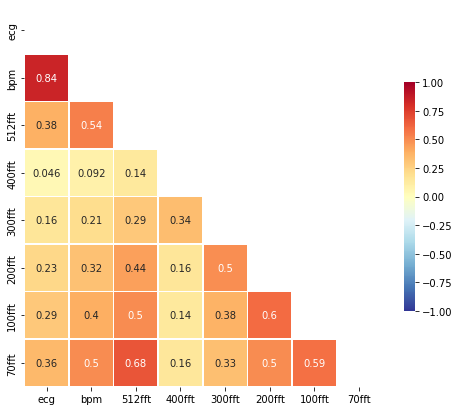

In [23]:
# 그림 사이즈
fig, ax = plt.subplots( figsize=(8,7) )

# 삼각형 마스크
mask = np.zeros_like(sit_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(sit_cor, 
            cmap = 'RdYlBu_r', # 컬러
            annot = True,      # 값 표시
            mask=mask,         # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,     # 경계면 실선
            cbar_kws={"shrink": .6},  # 컬러바 크기
            vmin = -1,vmax = 1        # 컬러바 범위 -1 ~ 1
            )  
plt.show()

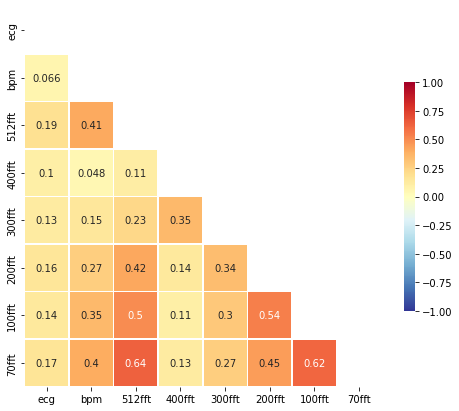

In [24]:
# 그림 사이즈
fig, ax = plt.subplots( figsize=(8,7) )

# 삼각형 마스크
mask = np.zeros_like(sleep_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(sleep_cor, 
            cmap = 'RdYlBu_r', # 컬러
            annot = True,      # 값 표시
            mask=mask,         # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,     # 경계면 실선
            cbar_kws={"shrink": .6},  # 컬러바 크기
            vmin = -1,vmax = 1        # 컬러바 범위 -1 ~ 1
            )  
plt.show()

In [25]:
data_sit_bin = data_sit.loc[:, ['ecg', 'bpm', 'bin-2', 'bin-1', 'bin0', 'bin1', 'bin2', '512fft', '70fft']]
data_sleep_bin = data_sleep.loc[:, ['ecg', 'bpm', 'bin-2', 'bin-1', 'bin0', 'bin1', 'bin2', '512fft', '70fft']]

In [26]:
sit_bin_cor = data_sit_bin.corr()
sleep_bin_cor = data_sleep_bin.corr()
sit_bin_cor

,ecg,bpm,bin-2,bin-1,bin0,bin1,bin2,512fft,70fft
ecg,1.000000,0.844092,0.324115,0.378734,0.384999,0.326550,0.267509,0.384999,0.355088
bpm,0.844092,1.000000,0.453621,0.482851,0.543525,0.468286,0.391115,0.543525,0.501176
bin-2,0.324115,0.453621,1.000000,0.491840,0.480962,0.250397,0.277675,0.480962,0.456949
bin-1,0.378734,0.482851,0.491840,1.000000,0.538501,0.324970,0.274559,0.538501,0.442925
bin0,0.384999,0.543525,0.480962,0.538501,1.000000,0.498571,0.443443,1.000000,0.675439
bin1,0.326550,0.468286,0.250397,0.324970,0.498571,1.000000,0.377884,0.498571,0.483961
bin2,0.267509,0.391115,0.277675,0.274559,0.443443,0.377884,1.000000,0.443443,0.373322
512fft,0.384999,0.543525,0.480962,0.538501,1.000000,0.498571,0.443443,1.000000,0.675439
70fft,0.355088,0.501176,0.456949,0.442925,0.675439,0.483961,0.373322,0.675439,1.000000


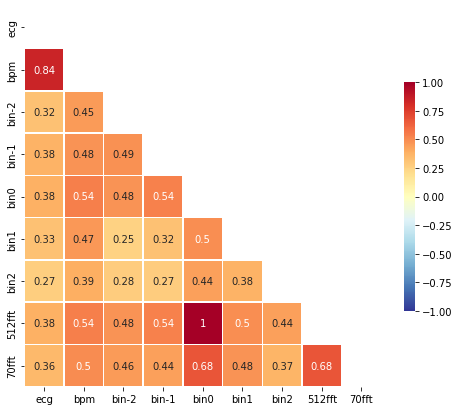

In [27]:
# 그림 사이즈
fig, ax = plt.subplots( figsize=(8,7) )

# 삼각형 마스크
mask = np.zeros_like(sit_bin_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(sit_bin_cor, 
            cmap = 'RdYlBu_r', # 컬러
            annot = True,      # 값 표시
            mask=mask,         # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,     # 경계면 실선
            cbar_kws={"shrink": .6},  # 컬러바 크기
            vmin = -1,vmax = 1        # 컬러바 범위 -1 ~ 1
            )  
plt.show()

### **(2) 2번보기**

## **4. 머신러닝 모델 확인**

### **(1) Sit 0.5 데이터**

In [28]:
import math
from numpy.random import seed
seed(1)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
X_train, X_val, y_train, y_val = train_test_split(data_sit.loc[:, ['512fft','400fft','300fft','200fft','100fft','70fft','bin_var','motion_energy']], data_sit['ecg'])

X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

X_train.head()

,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
22809,93.750000,0.000000,78.515625,96.093750,83.203125,98.437500,0.6400,1.017334
3925,89.062500,93.164062,92.578125,90.234375,90.234375,89.062500,0.0000,1.101452
1377,86.718750,89.062500,86.718750,91.406250,85.546875,85.546875,0.2475,0.240138
8175,90.234375,99.609375,99.609375,97.265625,97.265625,97.265625,1.6875,0.364173
9796,98.437500,99.609375,97.265625,99.609375,98.437500,98.437500,4.4475,1.919607


In [30]:
y_train.shape, y_val.shape

((18000, 1), (6000, 1))

In [31]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))

In [32]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [33]:
scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

In [34]:
xtrain_scale = scaler_x.transform(X_train)
xval_scale = scaler_x.transform(X_val)
ytrain_scale = scaler_y.transform(y_train)
yval_scale = scaler_y.transform(y_val)

In [35]:
model = Sequential()
model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [36]:
print(xtrain_scale.shape, ytrain_scale.shape)

(18000, 8) (18000, 1)


In [37]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
96/96 [==============================] - 1s 4ms/step - loss: 0.0197 - mse: 0.0197 - mae: 0.1075 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0804
Epoch 2/30
96/96 [==============================] - 0s 3ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0802 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0791
Epoch 3/30
96/96 [==============================] - 0s 2ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0786 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0765
Epoch 4/30
96/96 [==============================] - 0s 2ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0765 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0745
Epoch 5/30
96/96 [==============================] - 0s 2ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0744 - val_loss: 0.0077 - val_mse: 0.0077 - val_mae: 0.0720
Epoch 6/30
96/96 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0714 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0689
Epoch 7/30
96/96 [==========

In [38]:
scaler_y.fit(y_train)

predictions = model.predict(xval_scale)
sit_predictions = scaler_y.inverse_transform(predictions)
sit_predictions

array([[88.95556 ],
       [88.28497 ],
       [95.76537 ],
       ...,
       [91.464195],
       [88.46992 ],
       [91.19602 ]], dtype=float32)

In [39]:
np.average(sit_predictions)

90.682396

In [40]:
df_sit_label = y_val.reset_index(drop=True)
df_sit_predict = pd.DataFrame(sit_predictions, columns=['predict'])

df_sit_predict = pd.concat([df_sit_label, df_sit_predict], axis=1)

df_sit_predict

,ecg,predict
0,89.546828,88.955559
1,88.014639,88.284973
2,93.888889,95.765373
3,93.169985,93.209053
4,86.161399,88.526154
...,...,...
5995,98.673249,97.595024
5996,83.948339,87.278702
5997,84.936479,91.464195
5998,93.312883,88.469917


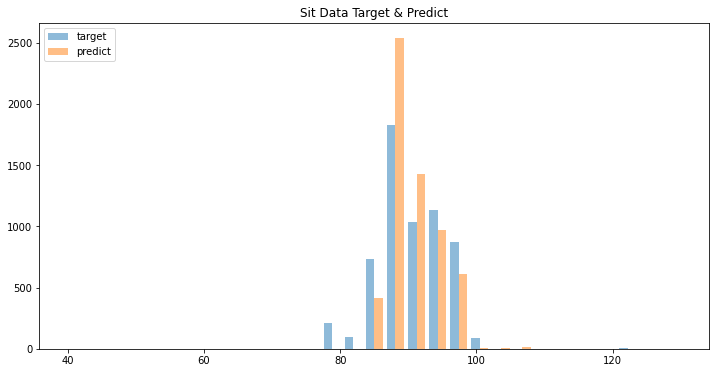

In [41]:
# 타겟값 예측값 히스토그램
bins = np.linspace(40, 130, 30)
plt.figure(figsize=(12,6))

plt.title('Sit Data Target & Predict')
plt.hist([df_sit_predict['ecg'],df_sit_predict['predict']], bins, alpha = 0.5, label = ['target', 'predict'])
plt.legend(loc='upper left')

- Sit 데이터의 경우 타겟값과 예측값이 비교적 비슷한 분포를 보인다.
- 낮은 심박수에 대한 예측 성능이 떨어지는 것으로 보인다.

**오차율 확인**

<img src="https://ifh.cc/g/1gvv9V.png" width="300">

In [67]:
df_sit_predict['Error_rate'] = 100 * (abs(df_sit_predict['ecg']-df_sit_predict['predict'])) / df_sit_predict['ecg']

df_sit_predict.head()

,ecg,predict,Error_rate
0,89.546828,88.955559,0.660290
1,88.014639,88.284973,0.307147
2,93.888889,95.765373,1.998622
3,93.169985,93.209053,0.041932
4,86.161399,88.526154,2.744564


In [68]:
np.average(df_sit_predict['Error_rate'])

2.5458896236526987

### **(2) Sleep 1.0 데이터**

In [42]:
X_s_train, X_s_val, y_s_train, y_s_val = train_test_split(data_sleep.loc[:, ['512fft','400fft','300fft','200fft','100fft','70fft','bin_var','motion_energy']], data_sleep['ecg'])

X_s_train = pd.DataFrame(X_s_train)
X_s_val = pd.DataFrame(X_s_val)
y_s_train = pd.DataFrame(y_s_train)
y_s_val = pd.DataFrame(y_s_val)

In [43]:
X_s_train.head()

,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
9073,70.312500,55.078125,49.218750,80.859375,79.687500,69.140625,12.96,0.932610
29798,77.343750,106.640625,108.984375,62.109375,59.765625,85.546875,15.36,0.257926
1410,101.953125,82.617188,79.687500,79.687500,80.859375,80.859375,12.00,5.295156
32353,58.593750,0.000000,60.937500,59.765625,58.593750,58.593750,35.64,1.684048
24795,75.000000,70.312500,76.171875,72.656250,73.828125,71.484375,0.00,0.397757


In [44]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [45]:
y_s_train=np.reshape(y_s_train, (-1,1))
y_s_val=np.reshape(y_s_val, (-1,1))

scaler_x.fit(X_s_train)
xtrain_s_scale = scaler_x.transform(X_s_train)
scaler_x.fit(X_s_val)
xval_s_scale = scaler_x.transform(X_s_val)
scaler_y.fit(y_s_train)
ytrain_s_scale = scaler_y.transform(y_s_train)
scaler_y.fit(y_s_val)
yval_s_scale = scaler_y.transform(y_s_val)

xtrain_s_scale = scaler_x.transform(X_s_train)
xval_s_scale = scaler_x.transform(X_s_val)
ytrain_s_scale = scaler_y.transform(y_s_train)
yval_s_scale = scaler_y.transform(y_s_val)

model_s = Sequential()
model_s.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
model_s.add(Dense(30, activation='relu'))
model_s.add(Dense(1, activation='linear'))
model_s.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_s.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history_s = model_s.fit(xtrain_s_scale, ytrain_s_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
149/149 [==============================] - 1s 3ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1082 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1039
Epoch 2/30
149/149 [==============================] - 0s 2ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.1036 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.0997
Epoch 3/30
149/149 [==============================] - 0s 2ms/step - loss: 0.0214 - mse: 0.0214 - mae: 0.1022 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.0999
Epoch 4/30
149/149 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.0212 - mae: 0.1017 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1004
Epoch 5/30
149/149 [==============================] - 0s 2ms/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1012 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1018
Epoch 6/30
149/149 [==============================] - 0s 2ms/step - loss: 0.0209 - mse: 0.0209 - mae: 0.1011 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.0991
Epoch 7/30
149/1

In [47]:
scaler_y.fit(y_s_train)

y_sleep_predict = model_s.predict(xval_s_scale)
sleep_predict = scaler_y.inverse_transform(y_sleep_predict)
sleep_predict

array([[60.072826],
       [65.340004],
       [60.525055],
       ...,
       [60.558334],
       [72.33531 ],
       [63.133015]], dtype=float32)

In [49]:
np.average(sleep_predict)

61.591076

In [50]:
print(y_s_val.shape)
print(y_sleep_predict.shape)

(9300, 1)
(9300, 1)


In [51]:
df_sl_label = y_s_val.reset_index(drop=True)
df_sl_predict = pd.DataFrame(sleep_predict, columns=['predict'])

df_sleep_predict = pd.concat([df_sl_label, df_sl_predict], axis=1)

df_sleep_predict

,ecg,predict
0,65.201238,60.072826
1,60.296846,65.340004
2,66.456295,60.525055
3,58.960630,61.400455
4,71.289001,64.457001
...,...,...
9295,55.645161,59.312031
9296,62.342453,63.882759
9297,54.812099,60.558334
9298,64.833760,72.335312


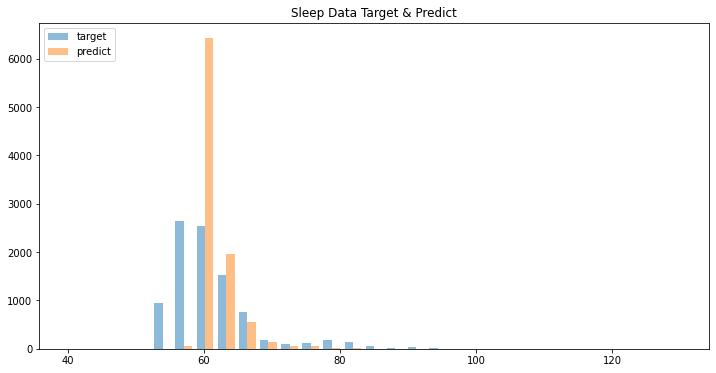

In [52]:
# 타겟값 예측값 히스토그램
bins = np.linspace(40, 130, 30)
plt.figure(figsize=(12,6))

plt.title('Sleep Data Target & Predict')
plt.hist([df_sleep_predict['ecg'],df_sleep_predict['predict']], bins, alpha = 0.5, label = ['target', 'predict'])
plt.legend(loc='upper left')

- 낮은 심박수에 대한 예측 성능이 떨어진다.
- 특정 심박수 범위로 몰리는 경향이 있다. (Data Imbalance 문제)
- 배치 샘플링 조절 필요

In [69]:
# 오차율
df_sleep_predict['Error_rate'] = 100 * (abs(df_sleep_predict['ecg']-df_sleep_predict['predict'])) / df_sleep_predict['ecg']

df_sleep_predict.head()

,ecg,predict,Error_rate
0,65.201238,60.072826,7.865513
1,60.296846,65.340004,8.363884
2,66.456295,60.525055,8.925024
3,58.960630,61.400455,4.138059
4,71.289001,64.457001,9.583526


In [70]:
# 오차율 평균
np.average(df_sleep_predict['Error_rate'])

6.2866275038140325

### **(3) Lie 1.0 데이터**

In [76]:
X_lie_train, X_lie_val, y_lie_train, y_lie_val = train_test_split(data_lie_10.loc[:, ['512fft','400fft','300fft','200fft','100fft','70fft','bin_var','motion_energy']], data_lie_10['ecg'])

X_lie_train = pd.DataFrame(X_lie_train)
X_lie_val = pd.DataFrame(X_lie_val)
y_lie_train = pd.DataFrame(y_lie_train)
y_lie_val = pd.DataFrame(y_lie_val)

X_lie_train.head()

,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
16228,53.906250,50.390625,53.906250,53.906250,53.906250,52.734375,0.00,0.903488
7856,58.593750,0.000000,62.109375,59.765625,60.937500,107.812500,2.25,4.024842
18854,62.109375,84.375000,80.859375,76.171875,89.062500,89.062500,0.00,0.072909
22714,107.812500,79.687500,109.570312,110.156250,94.921875,103.125000,0.00,0.283483
11142,76.171875,103.125000,107.812500,73.828125,75.000000,75.000000,0.36,0.079154


In [77]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [78]:
y_lie_train=np.reshape(y_lie_train, (-1,1))
y_lie_val=np.reshape(y_lie_val, (-1,1))

scaler_x.fit(X_lie_train)
xtrain_lie_scale = scaler_x.transform(X_lie_train)
scaler_x.fit(X_lie_val)
xval_lie_scale = scaler_x.transform(X_lie_val)
scaler_y.fit(y_lie_train)
ytrain_lie_scale = scaler_y.transform(y_lie_train)
scaler_y.fit(y_lie_val)
yval_lie_scale = scaler_y.transform(y_lie_val)

xtrain_lie_scale = scaler_x.transform(X_lie_train)
xval_lie_scale = scaler_x.transform(X_lie_val)
ytrain_lie_scale = scaler_y.transform(y_lie_train)
yval_lie_scale = scaler_y.transform(y_lie_val)

model_lie = Sequential()
model_lie.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
model_lie.add(Dense(30, activation='relu'))
model_lie.add(Dense(1, activation='linear'))
model_lie.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [79]:
model_lie.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history_lie = model_lie.fit(xtrain_lie_scale, ytrain_lie_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
173/173 [==============================] - 1s 4ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1331 - val_loss: 0.0313 - val_mse: 0.0313 - val_mae: 0.1404
Epoch 2/30
173/173 [==============================] - 0s 2ms/step - loss: 0.0297 - mse: 0.0297 - mae: 0.1276 - val_loss: 0.0302 - val_mse: 0.0302 - val_mae: 0.1296
Epoch 3/30
173/173 [==============================] - 0s 3ms/step - loss: 0.0291 - mse: 0.0291 - mae: 0.1262 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.1307
Epoch 4/30
173/173 [==============================] - 0s 3ms/step - loss: 0.0287 - mse: 0.0287 - mae: 0.1252 - val_loss: 0.0298 - val_mse: 0.0298 - val_mae: 0.1327
Epoch 5/30
173/173 [==============================] - 0s 2ms/step - loss: 0.0284 - mse: 0.0284 - mae: 0.1245 - val_loss: 0.0308 - val_mse: 0.0308 - val_mae: 0.1190
Epoch 6/30
173/173 [==============================] - 0s 3ms/step - loss: 0.0283 - mse: 0.0283 - mae: 0.1238 - val_loss: 0.0293 - val_mse: 0.0293 - val_mae: 0.1264
Epoch 7/30
173/1

In [80]:
scaler_y.fit(y_lie_train)

y_lie_predict = model_s.predict(xval_lie_scale)
lie_predict = scaler_y.inverse_transform(y_lie_predict)
lie_predict

array([[53.397995],
       [53.84958 ],
       [55.19399 ],
       ...,
       [68.8956  ],
       [55.505035],
       [54.370735]], dtype=float32)

In [81]:
np.average(lie_predict)

56.156292

In [82]:
print(y_lie_val.shape)
print(y_lie_predict.shape)

(10800, 1)
(10800, 1)


In [83]:
df_l_label = y_lie_val.reset_index(drop=True)
df_l_predict = pd.DataFrame(lie_predict, columns=['predict'])

df_lie_predict = pd.concat([df_l_label, df_l_predict], axis=1)

df_lie_predict

,ecg,predict
0,48.073960,53.397995
1,54.964766,53.849579
2,55.541796,55.193989
3,71.042714,56.038368
4,47.402005,54.795456
...,...,...
10795,66.060226,59.417229
10796,50.781250,54.166557
10797,60.615480,68.895599
10798,67.177033,55.505035


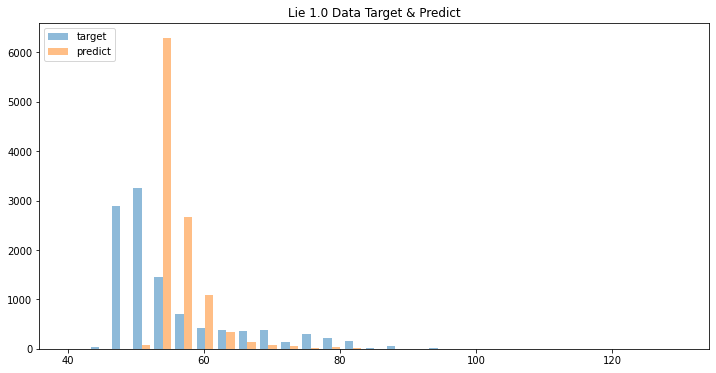

In [84]:
# 타겟값 예측값 히스토그램
bins = np.linspace(40, 130, 30)
plt.figure(figsize=(12,6))

plt.title('Lie 1.0 Data Target & Predict')
plt.hist([df_lie_predict['ecg'],df_lie_predict['predict']], bins, alpha = 0.5, label = ['target', 'predict'])
plt.legend(loc='upper left')

- 낮은 심박수에 대한 예측을 거의 하지 못한다.
- 특정 심박수 범위로 몰리는 경향이 있다.

In [85]:
# 오차율
df_lie_predict['Error_rate'] = 100 * (abs(df_lie_predict['ecg']-df_lie_predict['predict'])) / df_lie_predict['ecg']

df_lie_predict.head()

,ecg,predict,Error_rate
0,48.073960,53.397995,11.074675
1,54.964766,53.849579,2.028913
2,55.541796,55.193989,0.626207
3,71.042714,56.038368,21.120175
4,47.402005,54.795456,15.597337


In [275]:
# 오차율 평균
np.average(df_lie_predict['Error_rate'])

12.116220345313684

### **(4) Lie 0.5 데이터**

In [89]:
X_lie5_train, X_lie5_val, y_lie5_train, y_lie5_val = train_test_split(data_lie.loc[:, ['512fft','400fft','300fft','200fft','100fft','70fft','bin_var','motion_energy']], data_lie['ecg'])

X_lie5_train = pd.DataFrame(X_lie5_train)
X_lie5_val = pd.DataFrame(X_lie5_val)
y_lie5_train = pd.DataFrame(y_lie5_train)
y_lie5_val = pd.DataFrame(y_lie5_val)

X_lie5_train.head()

,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
9119,65.625000,51.56250,55.078125,59.765625,62.109375,64.453125,0.00,5.142144
11680,73.828125,72.65625,70.312500,72.656250,99.609375,73.828125,0.91,2.079637
4136,67.968750,60.93750,64.453125,63.281250,65.625000,89.062500,0.96,3.830132
13054,76.171875,60.93750,60.937500,64.453125,67.968750,77.343750,0.36,1.236152
10800,57.421875,58.59375,52.734375,55.078125,57.421875,57.421875,0.91,4.227371


In [90]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [91]:
y_lie5_train=np.reshape(y_lie5_train, (-1,1))
y_lie5_val=np.reshape(y_lie5_val, (-1,1))

scaler_x.fit(X_lie5_train)
xtrain_lie5_scale = scaler_x.transform(X_lie5_train)
scaler_x.fit(X_lie5_val)
xval_lie5_scale = scaler_x.transform(X_lie5_val)
scaler_y.fit(y_lie5_train)
ytrain_lie5_scale = scaler_y.transform(y_lie5_train)
scaler_y.fit(y_lie5_val)
yval_lie5_scale = scaler_y.transform(y_lie5_val)

xtrain_lie5_scale = scaler_x.transform(X_lie5_train)
xval_lie5_scale = scaler_x.transform(X_lie5_val)
ytrain_lie5_scale = scaler_y.transform(y_lie5_train)
yval_lie5_scale = scaler_y.transform(y_lie5_val)

model_lie5 = Sequential()
model_lie5.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
model_lie5.add(Dense(30, activation='relu'))
model_lie5.add(Dense(1, activation='linear'))
model_lie5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_13 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [92]:
model_lie5.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history_lie = model_lie5.fit(xtrain_lie5_scale, ytrain_lie5_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
53/53 [==============================] - 1s 5ms/step - loss: 0.1379 - mse: 0.1379 - mae: 0.3013 - val_loss: 0.0379 - val_mse: 0.0379 - val_mae: 0.1593
Epoch 2/30
53/53 [==============================] - 0s 2ms/step - loss: 0.0375 - mse: 0.0375 - mae: 0.1579 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.1511
Epoch 3/30
53/53 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367 - mae: 0.1562 - val_loss: 0.0348 - val_mse: 0.0348 - val_mae: 0.1505
Epoch 4/30
53/53 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1557 - val_loss: 0.0345 - val_mse: 0.0345 - val_mae: 0.1499
Epoch 5/30
53/53 [==============================] - 0s 2ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1551 - val_loss: 0.0341 - val_mse: 0.0341 - val_mae: 0.1498
Epoch 6/30
53/53 [==============================] - 0s 2ms/step - loss: 0.0354 - mse: 0.0354 - mae: 0.1546 - val_loss: 0.0336 - val_mse: 0.0336 - val_mae: 0.1499
Epoch 7/30
53/53 [==========

In [93]:
scaler_y.fit(y_lie5_train)

y_lie5_predict = model_s.predict(xval_lie5_scale)
lie5_predict = scaler_y.inverse_transform(y_lie5_predict)
lie5_predict

array([[71.416595],
       [70.93721 ],
       [70.88586 ],
       ...,
       [71.062706],
       [71.31672 ],
       [71.50891 ]], dtype=float32)

In [95]:
np.average(lie5_predict)

70.976395

In [96]:
df_l5_label = y_lie5_val.reset_index(drop=True)
df_l5_predict = pd.DataFrame(lie5_predict, columns=['predict'])

df_lie5_predict = pd.concat([df_l5_label, df_l5_predict], axis=1)

df_lie5_predict

,ecg,predict
0,73.671783,71.416595
1,75.515303,70.937210
2,77.975633,70.885857
3,71.221662,71.069504
4,71.647275,70.630974
...,...,...
3295,74.522293,70.726898
3296,77.132262,70.629501
3297,73.553365,71.062706
3298,74.652671,71.316719


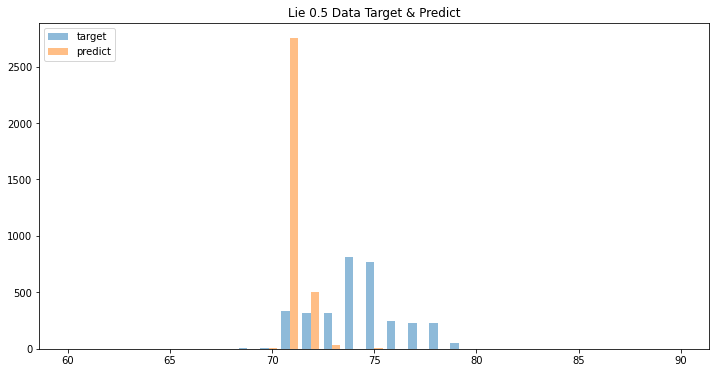

In [111]:
# 타겟값 예측값 히스토그램
bins = np.linspace(60, 90, 30)
plt.figure(figsize=(12,6))

plt.title('Lie 0.5 Data Target & Predict')
plt.hist([df_lie5_predict['ecg'],df_lie5_predict['predict']], bins, alpha = 0.5, label = ['target', 'predict'])
plt.legend(loc='upper left')

- 대부분의 심박수를 70~72 범위로 예측하는 문제가 있다.
- 높은 심박수에 대한 예측 성능이 매우 떨어진다.


In [99]:
# 오차율
df_lie5_predict['Error_rate'] = 100 * (abs(df_lie5_predict['ecg']-df_lie5_predict['predict'])) / df_lie5_predict['ecg']

df_lie5_predict.head()

,ecg,predict,Error_rate
0,73.671783,71.416595,3.061128
1,75.515303,70.937210,6.062470
2,77.975633,70.885857,9.092297
3,71.221662,71.069504,0.213641
4,71.647275,70.630974,1.418478


In [155]:
# 오차율 평균
Er = np.average(df_lie5_predict['Error_rate'])
Er

4.485220984236485

In [159]:
# 결정계수
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(df_lie5_predict['ecg'], df_lie5_predict['predict'])
mae = mean_absolute_error(df_lie5_predict['ecg'], df_lie5_predict['predict'])
r2 = r2_score(df_lie5_predict['ecg'], df_lie5_predict['predict'])

display(pd.DataFrame([['MSE', mse],['MAE', mae],['R2', r2],['오차율', Er]], columns=['metric', 'score']))

,metric,score
0,MSE,15.164527
1,MAE,3.382178
2,R2,-2.744401
3,오차율,4.485221


## **5. 머신러닝 모델 개선**
회귀모델 개선방안 : 이상치 제거, 하이퍼파라미터 튜닝, Log Transform ...

### **(1) 이상치 제거**

이상치 제거를 통해 분포의 치우침을 개선하여 회귀모델 성능을 개선시킨다.

하지만, 심박수 모니터링의 경우 이상치를 인지해야 하기 때문에 주의가 필요해보인다.

In [115]:
data_sleep.head()

,Unnamed: 0,ecg,bpm,bin-2,bin-1,bin0,bin1,bin2,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
0,0,63.414634,79.68750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,65.000000,79.62024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,65.000000,79.55298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,65.000000,79.48572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,65.000000,79.41846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


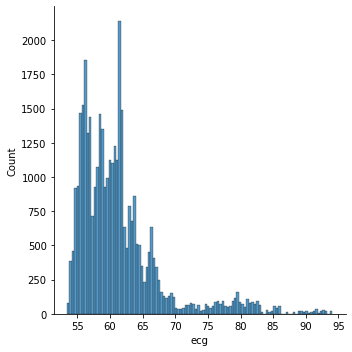

In [126]:
sns.displot(data_sleep['ecg'])

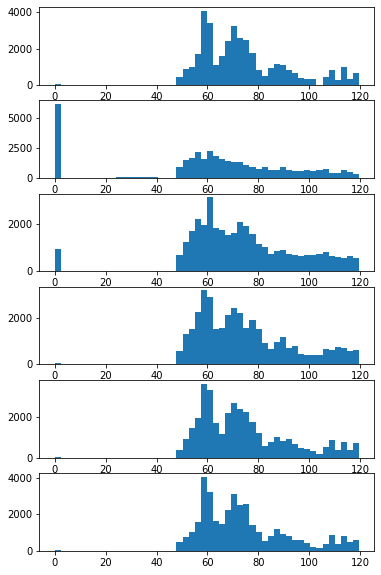

In [142]:
plt.figure(figsize=(6,10))

plt.subplot(611)
plt.hist(data_sleep['512fft'], bins=50)
plt.subplot(612)
plt.hist(data_sleep['400fft'], bins=50)
plt.subplot(613)
plt.hist(data_sleep['300fft'], bins=50)
plt.subplot(614)
plt.hist(data_sleep['200fft'], bins=50)
plt.subplot(615)
plt.hist(data_sleep['100fft'], bins=50)
plt.subplot(616)
plt.hist(data_sleep['70fft'], bins=50)

plt.show()

In [124]:
## FFT의 이상치를 제거합니다.

# data_sleep['512fft'] = data_sleep[data_sleep['512fft'] < np.percentile(data_sleep['512fft'], 99.5)]['512fft']
# data_sleep['400fft'] = data_sleep[data_sleep['400fft'] < np.percentile(data_sleep['400fft'], 99.5)]['400fft']
# data_sleep['300fft'] = data_sleep[data_sleep['300fft'] < np.percentile(data_sleep['300fft'], 99.5)]['300fft']
# data_sleep['200fft'] = data_sleep[data_sleep['200fft'] < np.percentile(data_sleep['200fft'], 99.5)]['200fft']
# data_sleep['100fft'] = data_sleep[data_sleep['100fft'] < np.percentile(data_sleep['100fft'], 99.5)]['100fft']
# data_sleep['70fft'] = data_sleep[data_sleep['70fft'] < np.percentile(data_sleep['70fft'], 99.5)]['70fft']

In [166]:
data_sleep.shape

(37200, 16)

In [167]:
zero_data = data_sleep[data_sleep['512fft']<40 ].index
data_sleep.drop(zero_data, inplace=True)

In [169]:
zero_data2 = data_sleep[data_sleep['300fft']<40 ].index
data_sleep.drop(zero_data2, inplace=True)

In [175]:
data_sleep.shape

(36164, 16)

In [192]:
# 400fft 0값 대체
# random = np.random.randint(50,70)

# data_sleep['400fft'].replace([0, '0.0', 0.0], 60)

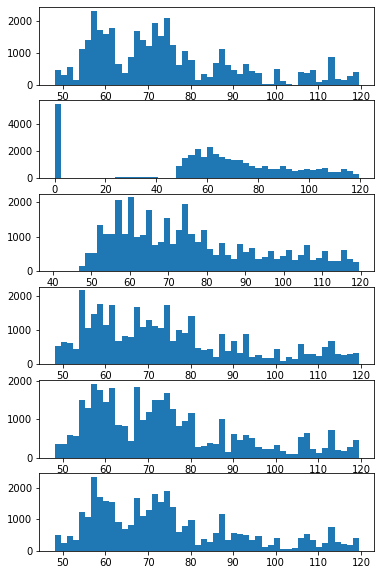

In [190]:
plt.figure(figsize=(6,10))

plt.subplot(611)
plt.hist(data_sleep['512fft'], bins=50)
plt.subplot(612)
plt.hist(data_sleep['400fft'], bins=50)
plt.subplot(613)
plt.hist(data_sleep['300fft'], bins=50)
plt.subplot(614)
plt.hist(data_sleep['200fft'], bins=50)
plt.subplot(615)
plt.hist(data_sleep['100fft'], bins=50)
plt.subplot(616)
plt.hist(data_sleep['70fft'], bins=50)

plt.show()

- 400FFT는 제외하고 학습을 진행하고자 한다.

### **(2) Log Transform**

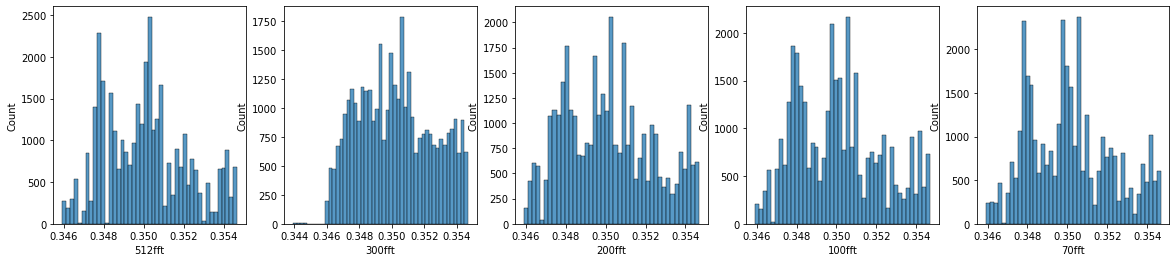

In [280]:
sleep_transform = data_sleep

sleep_transform['512fft'] = np.log1p(data_sleep['512fft'])
sleep_transform['300fft'] = np.log1p(data_sleep['300fft'])
sleep_transform['200fft'] = np.log1p(data_sleep['200fft'])
sleep_transform['100fft'] = np.log1p(data_sleep['100fft'])
sleep_transform['70fft'] = np.log1p(data_sleep['70fft'])

fig, ax = plt.subplots(1,5,figsize=(20,4))
sns.histplot(sleep_transform['512fft'], ax=ax[0]);
sns.histplot(sleep_transform['300fft'], ax=ax[1]);
sns.histplot(sleep_transform['200fft'], ax=ax[2]);
sns.histplot(sleep_transform['100fft'], ax=ax[3]);
sns.histplot(sleep_transform['70fft'], ax=ax[4]);

- 정규분포에 어느정도 가까워졌다.

In [204]:
sleep_transform.head()

,Unnamed: 0,ecg,bpm,bin-2,bin-1,bin0,bin1,bin2,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
52,52,61.904762,76.189983,0.0,37.500000,52.148438,50.976562,26.367188,0.513689,52.148438,0.513689,0.513689,0.513689,0.513689,13.0475,0.002481
53,53,61.904762,76.122724,0.0,76.171875,104.882812,102.539062,52.734375,0.528270,104.882812,0.528270,0.528270,0.528270,0.528270,12.9500,0.002481
54,54,61.904762,76.055464,0.0,77.343750,107.226562,104.296875,53.320312,0.528685,107.226562,0.528685,0.528685,0.528685,0.528685,12.8475,0.002481
55,55,61.904762,75.988204,0.0,77.343750,110.156250,106.054688,53.906250,0.529187,110.156250,0.529187,0.529187,0.529187,0.529187,12.7400,0.002481
56,56,61.904762,75.920944,0.0,77.343750,111.914062,106.640625,54.492188,0.529480,111.914062,0.529480,0.529480,0.529480,0.529480,12.6275,0.002481


In [231]:
X_train, X_val, y_train, y_val = train_test_split(sleep_transform.loc[:, ['bin-1','bin0','bin1','512fft','300fft','200fft','100fft','70fft','bin_var','motion_energy']], sleep_transform['ecg'])

X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

In [232]:
scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

In [233]:
xtrain_scale = scaler_x.transform(X_train)
xval_scale = scaler_x.transform(X_val)
ytrain_scale = scaler_y.transform(y_train)
yval_scale = scaler_y.transform(y_val)

In [235]:
print(xtrain_scale.shape, ytrain_scale.shape)

(27123, 10) (27123, 1)


In [234]:
model = Sequential()
model.add(Dense(20, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_25 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 31        
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [236]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
145/145 [==============================] - 1s 3ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.1137 - val_loss: 0.0220 - val_mse: 0.0220 - val_mae: 0.1026
Epoch 2/30
145/145 [==============================] - 0s 2ms/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1014 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.1009
Epoch 3/30
145/145 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.0989 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.0969
Epoch 4/30
145/145 [==============================] - 0s 3ms/step - loss: 0.0193 - mse: 0.0193 - mae: 0.0975 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.0970
Epoch 5/30
145/145 [==============================] - 0s 3ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.0967 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.0972
Epoch 6/30
145/145 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.0959 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.0958
Epoch 7/30
145/1

In [237]:
scaler_y.fit(y_train)

predict_s = model.predict(xval_scale)
sleep_prediction = scaler_y.inverse_transform(predict_s)
sleep_prediction

array([[57.24934 ],
       [58.7268  ],
       [62.990974],
       ...,
       [61.30797 ],
       [59.29762 ],
       [59.402035]], dtype=float32)

In [238]:
np.average(sleep_prediction)

61.185524

In [239]:
sleep_label = y_val.reset_index(drop=True)
sleep_predict = pd.DataFrame(sleep_prediction, columns=['predict'])

df_sleep = pd.concat([sleep_label, sleep_predict], axis=1)

df_sleep

,ecg,predict
0,59.234508,57.249340
1,55.870445,58.726799
2,79.273175,62.990974
3,57.724329,61.081913
4,64.116345,59.111668
...,...,...
9036,56.572983,60.725605
9037,55.975039,59.614685
9038,63.954588,61.307968
9039,61.090226,59.297619


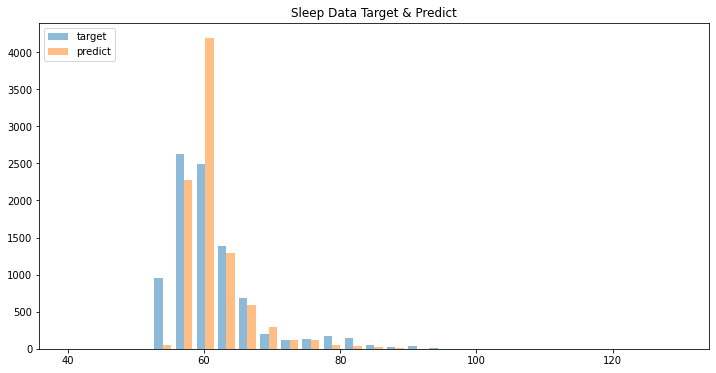

In [240]:
# 타겟값 예측값 히스토그램
bins = np.linspace(40, 130, 30)
plt.figure(figsize=(12,6))

plt.title('Sleep Data Target & Predict')
plt.hist([df_sleep['ecg'],df_sleep['predict']], bins, alpha = 0.5, label = ['target', 'predict'])
plt.legend(loc='upper left')

- 타겟값의 분포와 비교적 비슷해진 모습을 보인다.
- 낮은 심박수에 대한 예측 성능이 떨어지는 것으로 보인다.

In [241]:
# 오차율
df_sleep['Error_rate'] = 100 * (abs(df_sleep['ecg']-df_sleep['predict'])) / df_sleep['ecg']

df_sleep.head()

,ecg,predict,Error_rate
0,59.234508,57.249340,3.351371
1,55.870445,58.726799,5.112459
2,79.273175,62.990974,20.539357
3,57.724329,61.081913,5.816583
4,64.116345,59.111668,7.805619


In [242]:
# 오차율 평균
np.average(df_sleep['Error_rate'])

5.2009198776969265

- 6.28 -> 5.20으로 오차율이 개선된 것으로 확인된다.

### **(3) RandomForestRegressor**

In [ ]:
!pip install category_encoders

In [256]:
from sklearn.pipeline import make_pipeline

from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [277]:
X_train, X_val, y_train, y_val = train_test_split(sleep_transform.loc[:, ['bin-1','bin0','bin1','512fft','300fft','200fft','100fft','70fft','bin_var','motion_energy']], sleep_transform['ecg'])

X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

In [255]:
# 파이프라인

pipe = make_pipeline(
    TargetEncoder(smoothing=150.0),
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(n_estimators=200, max_depth=14, random_state=1)
)

pipe.fit(X_train, y_train)

print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


훈련 정확도 0.9471746593511946
검증 정확도 0.9386102093236979


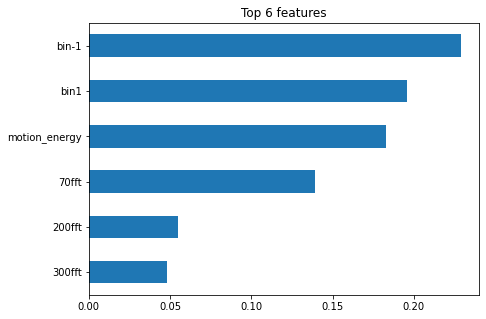

In [261]:
# 특성 중요도(ordinal)
rf = pipe.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 6
plt.figure(figsize=(7,5))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

- 특성 중요도에서 예상 외의 결과가 나왔다.

### **(4) Hyper-parameter 튜닝**

In [262]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe2 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=1)
)

dists = {   
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 100, 200),
    'randomforestregressor__max_depth': [4, 8, 12, 16], 
    'randomforestregressor__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe2, 
    param_distributions=dists, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [263]:
print('최적 하이퍼파라미터', clf.best_params_)

최적 하이퍼파라미터 {'randomforestregressor__max_depth': 16, 'randomforestregressor__max_features': 0.6556924148322318, 'randomforestregressor__n_estimators': 274, 'simpleimputer__strategy': 'mean'}


In [264]:
pipe_new = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestRegressor(n_estimators=274, max_depth=16, random_state=1, max_features=0.65569)
)

pipe_new.fit(X_train, y_train)

print('훈련 정확도', pipe_new.score(X_train, y_train))
print('검증 정확도', pipe_new.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


훈련 정확도 0.9841689988975669
검증 정확도 0.9792470098987518


In [269]:
y_val_pred = pipe_new.predict(X_val)
y_val_pred

array([59.37990321, 56.23422077, 79.28157162, ..., 63.3554826 ,
       60.35109828, 56.99840505])

In [272]:
y_val = y_val.reset_index(drop=True)
y_val_pred = pd.DataFrame(y_val_pred, columns=['predict'])

RandomForReg_predict = pd.concat([y_val, y_val_pred], axis=1)

RandomForReg_predict

,ecg,predict
0,59.234508,59.379903
1,55.870445,56.234221
2,79.273175,79.281572
3,57.724329,58.018551
4,64.116345,62.271308
...,...,...
9036,56.572983,56.551380
9037,55.975039,57.028780
9038,63.954588,63.355483
9039,61.090226,60.351098


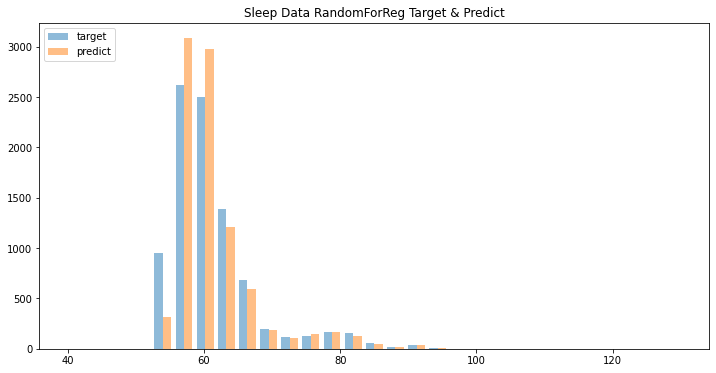

In [278]:
# 타겟값 예측값 히스토그램
bins = np.linspace(40, 130, 30)
plt.figure(figsize=(12,6))

plt.title('Sleep Data RandomForReg Target & Predict')
plt.hist([RandomForReg_predict['ecg'],RandomForReg_predict['predict']], bins, alpha = 0.5, label = ['target', 'predict'])
plt.legend(loc='upper left')

In [274]:
# 오차율
RandomForReg_predict['Error_rate'] = 100 * (abs(RandomForReg_predict['ecg']-RandomForReg_predict['predict'])) / RandomForReg_predict['ecg']

RandomForReg_predict.head()

,ecg,predict,Error_rate
0,59.234508,59.379903,0.245457
1,55.870445,56.234221,0.651105
2,79.273175,79.281572,0.010592
3,57.724329,58.018551,0.509701
4,64.116345,62.271308,2.877639


In [276]:
# 오차율 평균
np.average(RandomForReg_predict['Error_rate'])

0.9284085613455089

- 1% 미만의 오차율 값을 얻을 수 있었다.